In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt

In [2]:
router_names = ["Seattle", "Sunnvale", "Los Angeles", "Denver", "kansas city", "indianapolis", "chicago", "new york", "washington", "Houston", "atlanta"]    

In [3]:
len(router_names)

11

In [4]:
# we want router links to be a matrix with link = 1 if there is a linkn between the two
router_links = np.zeros((11,11))


In [7]:
np.where(router_names=="Seattle")

(array([], dtype=int64),)

In [8]:
router_names.index("Sunnvale")

1

In [9]:
link_list = [("Seattle", "Denver" ), ("Denver", "kansas city"), ("kansas city", "indianapolis"), ("indianapolis","chicago" ), ("chicago", "new york"), ("new york", "washington"), ("washington", "atlanta"), ("atlanta", "indianapolis"), ("Houston","kansas city" ), ("Houston","Los Angeles" ), ("Los Angeles", "Sunnvale"), ("Sunnvale","kansas city" ), ("Sunnvale","Denver" ), ("atlanta", "Houston")]

In [10]:
link_list

[('Seattle', 'Denver'),
 ('Denver', 'kansas city'),
 ('kansas city', 'indianapolis'),
 ('indianapolis', 'chicago'),
 ('chicago', 'new york'),
 ('new york', 'washington'),
 ('washington', 'atlanta'),
 ('atlanta', 'indianapolis'),
 ('Houston', 'kansas city'),
 ('Houston', 'Los Angeles'),
 ('Los Angeles', 'Sunnvale'),
 ('Sunnvale', 'kansas city'),
 ('Sunnvale', 'Denver'),
 ('atlanta', 'Houston')]

In [11]:
len(link_list)
capacities = []
for i in range(0, len(link_list)):
    capacities.append(np.round(5.0*random.random()+.1, 2))

In [12]:
j=0
for pair in link_list:
    router_links[router_names.index(pair[0]), router_names.index(pair[1])] = capacities[j]
    router_links[router_names.index(pair[1]), router_names.index(pair[0])] = capacities[j]
    j+=1

In [13]:
router_links

array([[0.  , 0.  , 0.  , 0.57, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 3.26, 2.3 , 0.88, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 3.26, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 3.64, 0.  ],
       [0.57, 2.3 , 0.  , 0.  , 4.16, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.88, 0.  , 4.16, 0.  , 3.44, 0.  , 0.  , 0.  , 2.88, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 3.44, 0.  , 0.42, 0.  , 0.  , 0.  , 3.09],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.42, 0.  , 3.03, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 3.03, 0.  , 4.95, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 4.95, 0.  , 0.  , 0.13],
       [0.  , 0.  , 3.64, 0.  , 2.88, 0.  , 0.  , 0.  , 0.  , 0.  , 4.36],
       [0.  , 0.  , 0.  , 0.  , 0.  , 3.09, 0.  , 0.  , 0.13, 4.36, 0.  ]])

In [14]:
#ok now we need capacities, 13 of them

In [15]:
# now we need to model how to send traffic,so we need the traffic demands
#ok so for now, let's just say Sunnyvale needs to send to NYC 3 units every time, and kansas is sending
#to houston 1 packet per time step
#if sunnyvale routes through denver, all traffic is dropped

In [16]:
#so each will decide using exp3 which link to pick and then send traffic, and if there is more traffic than link
#utilization we randomly drop one, and the router can find out which traffic arrived.

In [17]:
#ok now the exp3 algorithm
candpaths = [["Sunnvale","Denver", "kansas city", "indianapolis", "chicago", "new york" ], ["Sunnvale","Denver", "kansas city", "Houston", "atlanta", "washington","new york"], ["Sunnvale", "Los Angeles","Houston", "atlanta","washington", "new york"], ["Sunnvale", "Los Angeles","Houston", "atlanta","indianapolis", "chicago", "new york"]]

In [18]:
candpaths

[['Sunnvale', 'Denver', 'kansas city', 'indianapolis', 'chicago', 'new york'],
 ['Sunnvale',
  'Denver',
  'kansas city',
  'Houston',
  'atlanta',
  'washington',
  'new york'],
 ['Sunnvale', 'Los Angeles', 'Houston', 'atlanta', 'washington', 'new york'],
 ['Sunnvale',
  'Los Angeles',
  'Houston',
  'atlanta',
  'indianapolis',
  'chicago',
  'new york']]

In [19]:
gamma = 0.02

In [20]:
#so now our exp3 algorithm

w = np.zeros((len(candpaths),))

In [21]:
w += 1.0
K = len(candpaths)

In [22]:
pit = np.zeros((K,))

In [23]:
for i in range(0, K):
    pit[i] = (1.0 - gamma)*w[i]/np.sum(w) + 1.0*gamma/K

In [24]:
pit

array([0.25, 0.25, 0.25, 0.25])

In [25]:
np.random.uniform(0,1)

0.5169495958267537

In [56]:
def drawit(pit):
    prev = 0
    standard = 0
    u = np.random.uniform(0,1)
    print(u)
    for i in range(0, len(pit)):
        prev += pit[i]
        if u <= prev:
            return i
    return None
    

In [57]:
drawit(pit)
candpaths[drawit(pit)]

0.9431204593040451
0.6858438687399183


['Sunnvale', 'Los Angeles', 'Houston', 'atlanta', 'washington', 'new york']

In [121]:
# so we'll do a combination of exceeding the link capacity and Denver stealing data
def get_reward(cpath):
    linkcaps = []
    for i in range(0, len(cpath)-1):
        linkcap =router_links[router_names.index(cpath[i]), router_names.index(cpath[i+1])]
        #print(linkcap)
        linkcaps.append(linkcap)
    if "Denver" in cpath:
        print("denver")
        return np.min(linkcaps)*.5
    return np.min(linkcaps)
        

In [87]:
cpath = candpaths[drawit(pit)]
print(cpath)
get_reward(cpath)

0.5885562053962825
['Sunnvale', 'Los Angeles', 'Houston', 'atlanta', 'washington', 'new york']


0.13

In [88]:
w = np.zeros((len(candpaths),))
w += 1.0
thepitss = []
denv = 0
gamma = 0.3
latest = 0
pitt = np.zeros((K,))
for t in range(0,400):
    for i in range(0, K):
        pitt[i] = (1.0 - gamma)*w[i]/np.sum(w) + 1.0*gamma/K
    print(pitt)   
    thepitss.append(pitt.copy())  
    action = drawit(pitt)
    print(action)
    cpath = candpaths[action]
    if "Denver" in cpath:
        latest = t
        denv +=1
    print(cpath)
    reward = get_reward(cpath)
    w[action] = w[action]*np.exp(((reward*gamma)/(K*pitt[action]))) 
        
                


    

[0.25 0.25 0.25 0.25]
0.9801375452742749
3
['Sunnvale', 'Los Angeles', 'Houston', 'atlanta', 'indianapolis', 'chicago', 'new york']
[0.24431597 0.24431597 0.24431597 0.26705209]
0.2205124339750325
0
['Sunnvale', 'Denver', 'kansas city', 'indianapolis', 'chicago', 'new york']
denver
[0.25272797 0.2416321  0.2416321  0.26400782]
0.4861445519332206
1
['Sunnvale', 'Denver', 'kansas city', 'Houston', 'atlanta', 'washington', 'new york']
denver
[0.2518699  0.2442072  0.2408276  0.26309529]
0.8261836687792621
3
['Sunnvale', 'Los Angeles', 'Houston', 'atlanta', 'indianapolis', 'chicago', 'new york']
[0.24602476 0.2386153  0.23534739 0.28001254]
0.15318673260806648
0
['Sunnvale', 'Denver', 'kansas city', 'indianapolis', 'chicago', 'new york']
denver
[0.25443319 0.23601453 0.23279856 0.27675372]
0.5490651976324757
2
['Sunnvale', 'Los Angeles', 'Houston', 'atlanta', 'washington', 'new york']
[0.25271966 0.23447689 0.2379764  0.27482704]
0.5064364675281328
2
['Sunnvale', 'Los Angeles', 'Houston', 

3
['Sunnvale', 'Los Angeles', 'Houston', 'atlanta', 'indianapolis', 'chicago', 'new york']
[0.1146177  0.08015948 0.09059333 0.71462949]
0.8366026849451709
3
['Sunnvale', 'Los Angeles', 'Houston', 'atlanta', 'indianapolis', 'chicago', 'new york']
[0.11305083 0.07995543 0.08997662 0.71701712]
0.4817198918494193
3
['Sunnvale', 'Los Angeles', 'Houston', 'atlanta', 'indianapolis', 'chicago', 'new york']
[0.11154548 0.07975938 0.08938412 0.71931102]
0.5699574454397974
3
['Sunnvale', 'Los Angeles', 'Houston', 'atlanta', 'indianapolis', 'chicago', 'new york']
[0.11009926 0.07957104 0.08881489 0.7215148 ]
0.5297967871569854
3
['Sunnvale', 'Los Angeles', 'Houston', 'atlanta', 'indianapolis', 'chicago', 'new york']
[0.1087099  0.0793901  0.08826805 0.72363196]
0.6120832034594745
3
['Sunnvale', 'Los Angeles', 'Houston', 'atlanta', 'indianapolis', 'chicago', 'new york']
[0.10737517 0.07921628 0.0877427  0.72566585]
0.6427227633950148
3
['Sunnvale', 'Los Angeles', 'Houston', 'atlanta', 'indianapoli

In [30]:
pitt

array([0.075, 0.075, 0.775, 0.075])

In [31]:
l = []
l.append(pitt)
l
l.append(pitt)
l
pitt[0] = 0.5
l.append(pitt)
pitt[0] = 0.3
l.append(pitt)
l

[array([0.3  , 0.075, 0.775, 0.075]),
 array([0.3  , 0.075, 0.775, 0.075]),
 array([0.3  , 0.075, 0.775, 0.075]),
 array([0.3  , 0.075, 0.775, 0.075])]

In [32]:
[x for x in thepitss]

[array([0.25, 0.25, 0.25, 0.25]),
 array([0.21784905, 0.21784905, 0.34645285, 0.21784905]),
 array([0.20434652, 0.20434652, 0.3207943 , 0.27051266]),
 array([0.20412658, 0.20531685, 0.32037636, 0.27018021]),
 array([0.20390642, 0.20628815, 0.31995799, 0.26984743]),
 array([0.17997661, 0.1819162 , 0.40443067, 0.23367652]),
 array([0.17981076, 0.18285321, 0.4039102 , 0.23342583]),
 array([0.18074344, 0.1826842 , 0.40339479, 0.23317757]),
 array([0.18057589, 0.18362274, 0.40287444, 0.23292693]),
 array([0.18040801, 0.18456309, 0.40235309, 0.23267581]),
 array([0.17027297, 0.17402853, 0.3708779 , 0.2848206 ]),
 array([0.17118294, 0.17387952, 0.37043267, 0.28450487]),
 array([0.17209531, 0.17373011, 0.36998627, 0.28418831]),
 array([0.16236765, 0.16383867, 0.34043257, 0.33336112]),
 array([0.16325447, 0.16371007, 0.34004834, 0.33298712]),
 array([0.14684564, 0.14721654, 0.42091727, 0.28502055]),
 array([0.13343992, 0.13374161, 0.48698581, 0.24583267]),
 array([0.12774866, 0.12802097, 0.4468

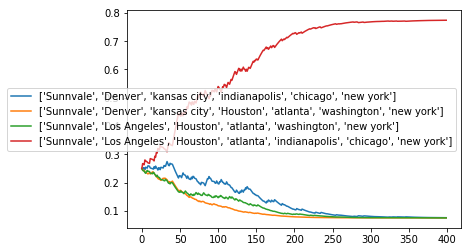

In [89]:
plt.plot(range(0,400), [x[0] for x in thepitss],label= candpaths[0])
plt.plot(range(0,400), [x[1] for x in thepitss], label=candpaths[1])
plt.plot(range(0,400), [x[2] for x in thepitss],label= candpaths[2])
plt.plot(range(0,400), [x[3] for x in thepitss], label = candpaths[3])
plt.legend()
plt.show()

In [90]:
denv

95

In [85]:
latest

399

In [297]:
thepits[:,2]

TypeError: list indices must be integers or slices, not tuple

In [210]:
np.sum(w)

71.31477572642714

In [211]:
w[3]

6.630493149723913

In [212]:
(1.0-gamma)*(w[0]/np.sum(w))

0.044915391476121225

In [122]:
NEXP = 8
candpaths

[['Sunnvale', 'Denver', 'kansas city', 'indianapolis', 'chicago', 'new york'],
 ['Sunnvale',
  'Denver',
  'kansas city',
  'Houston',
  'atlanta',
  'washington',
  'new york'],
 ['Sunnvale', 'Los Angeles', 'Houston', 'atlanta', 'washington', 'new york'],
 ['Sunnvale',
  'Los Angeles',
  'Houston',
  'atlanta',
  'indianapolis',
  'chicago',
  'new york']]

In [123]:
np.exp(-5)

0.006737946999085467

In [241]:
#exp 4 algorithm
w = np.zeros((NEXP,))
w += 1.0
denv = 0
thepitss = []
for t in range(0,400):
    #np.random.shuffle(expdecs)
    expdecs = [0, 1, 0,1,2,0, 3, 1]
    pt = np.zeros((len(candpaths)))
    denom = np.sum(w)
    for a in range(0, len(candpaths)):
        summ = 0
        for i in range(0, NEXP):
            if expdecs[i] == a:
                summ += w[i]
        pt[a] = summ/denom
    #print(t, " ", pt)
    #print("top is ", pt)
    #print("the sum of tp is ", np.sum(pt))
    thepitss.append(pt.copy())
    #print(len(thepitss))
    action = drawit(pt)
    #print("Action", action)
    #form cost estimates
    costs = np.zeros((len(candpaths)))
    cpath = candpaths[action]
    if "Denver" in cpath:
        latest = t
        denv +=1
    reward = (5.0 - get_reward(cpath))
    costs[action]  = 1.0*reward/pt[a]
    #print("costs", costs)
    #updates
    for i in range(0,NEXP):
        w[i] = w[i]*np.exp(-1.0*.5*costs[expdecs[i]])
    #print("w is ", w)
    
            
            
    
        

0.586113927470675
denver
0.7217994159988339
0.5402620185737751
denver
0.7795549741243893
0.9874947427776323
0.08772854212827064
0.7492217760019438
0.7282222772636929
denver
0.43875227877689404
0.3263862816033105
0.7206535671044076
0.3336332411401701
0.008659468835537809
denver
0.693020088095885
0.34806636559713244
0.2702015258841266
denver
0.8442603341226568
0.35777286433553857
denver
0.16823595652480428
0.3115792036998304
0.3803453582474875
denver
0.651168178948433
0.31237136367159
0.9035166910602371
0.6740328214793138
denver
0.3967616097527721
0.9177560868847215
0.9362564615788833
0.865062143539365
0.5145306908646695
0.33195473465420056
0.05536572128252293
0.7353145907941169
0.28722302302177816
0.44196699849647036
0.38921828241362244
0.7034116858060643
0.7625282902192698
0.3169596613753368
0.31599151375269796
denver
0.4517356818137659
0.3685280856952534
0.3222886219439315
0.1338955361126506
denver
0.06808101807301259
0.36327757859942134
0.49251071474698005
denver
0.5291029039764431
0

/Users/arushigupta/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in double_scalars


TypeError: list indices must be integers or slices, not NoneType

In [242]:
len(thepitss)

357

In [243]:
denv

27

In [244]:
get_reward(candpaths[2])

0.13

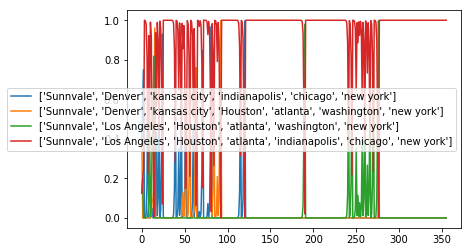

In [245]:
plt.plot(range(0,len(thepitss)), [x[0] for x in thepitss],label= candpaths[0])
plt.plot(range(0,len(thepitss)), [x[1] for x in thepitss], label=candpaths[1])
plt.plot(range(0,len(thepitss)), [x[2] for x in thepitss],label= candpaths[2])
plt.plot(range(0,len(thepitss)), [x[3] for x in thepitss], label = candpaths[3])
plt.legend()
plt.show()

In [135]:
plt.plot(range(0,400), [x[0] for x in thepitsss],label= candpaths[0])
plt.plot(range(0,400), [x[1] for x in thepitsss], label=candpaths[1])
plt.plot(range(0,400), [x[2] for x in thepitsss],label= candpaths[2])
plt.plot(range(0,400), [x[3] for x in thepitsss], label = candpaths[3])
plt.legend()
plt.show()

NameError: name 'thepitsss' is not defined